# Analysing and plotting magnetic resonance data

This notebook contains a quick example of plotting data stored in magres files, without performing any referencing.

In [1]:
from matador.scrapers import magres2dict
from matador.plotting import plot_magres
magres, failures = magres2dict("*.magres", as_model=True)

Successfully scraped 2 out of 2 files.


In [2]:
for doc in magres:
    print(doc)
    doc.print_sites()

Li3P: LiP_CASTEP18
20  atoms. P1
(a, b, c) = 4.1333 Å, 6.0638 Å, 12.5450 Å
(α, β, γ) = 88.4518° 80.5130° 90.0085°

---
  0 Li 0.0916 0.3584 0.9424
chemical_shielding_iso = 83.7003
magnetic_shielding_tensor = 
  [[ 8.16e+01  6.11e-03 -4.30e-02]
   [ 1.27e-02  7.99e+01  1.36e+00]
   [-5.07e-02  2.13e+00  8.96e+01]]
chemical_shift_aniso = 9.3772
chemical_shift_asymmetry = 0.3284
---
  1 Li 0.1983 0.7851 0.7195
chemical_shielding_iso = 84.3395
magnetic_shielding_tensor = 
  [[8.40e+01 9.13e-02 4.66e-02]
   [1.30e-01 8.70e+01 9.94e-01]
   [9.87e-02 1.57e+00 8.21e+01]]
chemical_shift_aniso = 4.4293
chemical_shift_asymmetry = 0.7621
---
  2 Li 0.2807 0.9980 0.5589
chemical_shielding_iso = 83.3730
magnetic_shielding_tensor = 
  [[ 8.12e+01 -1.51e-02 -4.42e-02]
   [ 1.19e-02  8.44e+01 -4.39e+00]
   [ 2.60e-03 -4.26e+00  8.45e+01]]
chemical_shift_aniso = 8.1433
chemical_shift_asymmetry = 0.1863
---
  3 Li 0.3473 0.7369 0.4079
chemical_shielding_iso = 86.6380
magnetic_shielding_tensor = 
  [[ 8.5

## Species as separate figures

No sites of Na found in LiP_CASTEP18, signal will be empty.
No sites of Li found in NaP_QE6, signal will be empty.


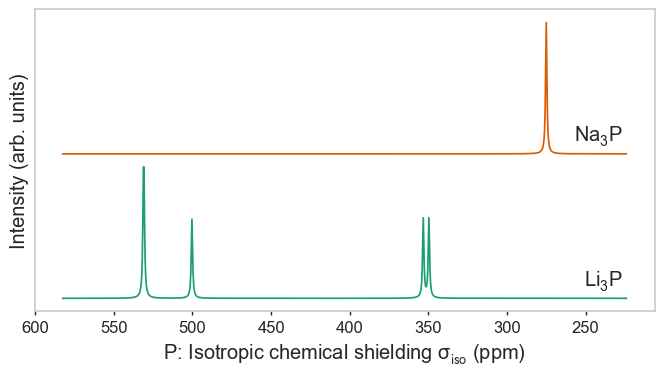

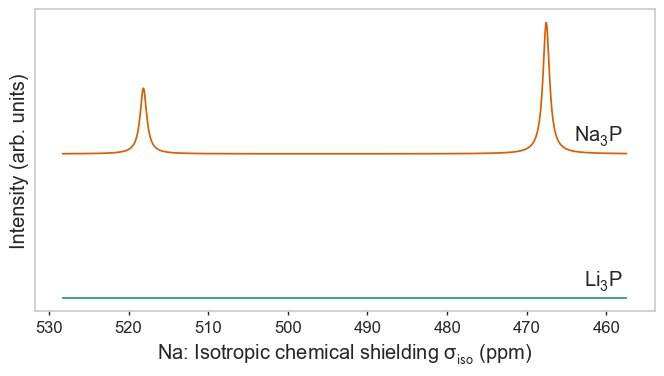

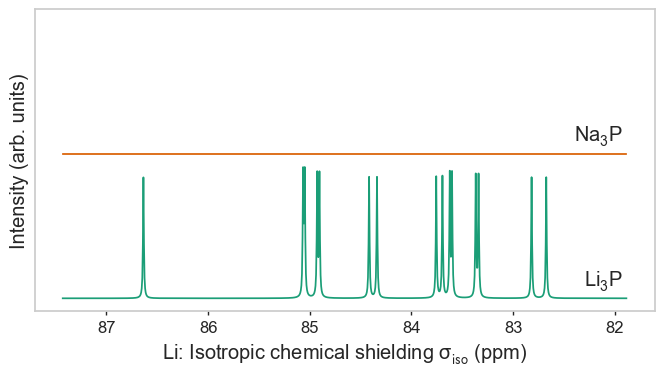

In [3]:
plot_magres(magres, "P")
plot_magres(magres, "Na")
plot_magres(magres, "Li", broadening_width=0.01);

## Species as subplots with custom colours and labels

No sites of Na found in LiP_CASTEP18, signal will be empty.
No sites of Li found in NaP_QE6, signal will be empty.


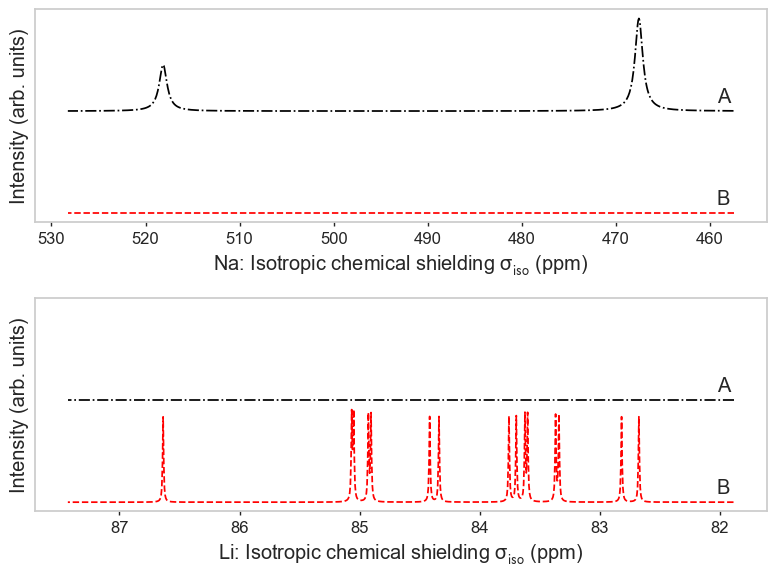

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
line_kwargs = [{"c": "red", "ls": "--"}, {"c": "black", "ls": "-."}]
labels = ["B", "A"]
plot_magres(
    magres, "Na", 
    ax=axes[0], line_kwargs=line_kwargs, signal_labels=labels
)
plot_magres(
    magres, "Li", broadening_width=0.01, 
    ax=axes[1], line_kwargs=line_kwargs, signal_labels=labels
)
plt.tight_layout()

## Other magres quantities as subplots

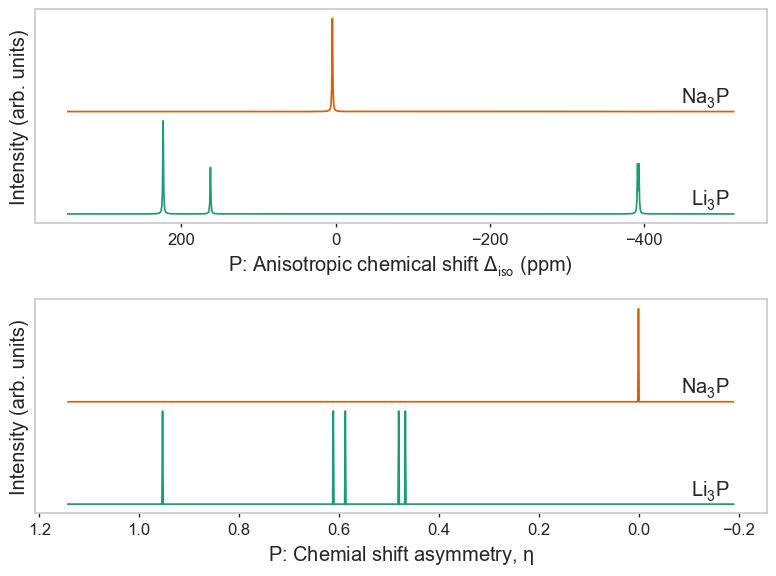

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
plot_magres(
    magres, "P", magres_key="chemical_shift_aniso",
    ax=axes[0]
)
plot_magres(
    magres, "P", magres_key="chemical_shift_asymmetry",
    ax=axes[1],
    broadening_width=0,
)
plt.tight_layout()